In [104]:
#useful lybraries are imported
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# **Data Understanding & Exploration:**

**Data set 1 and 2 contains the gender and customerId as primary key which is used to combine the two data sets and data also contains parter of the costumer and extra**

In [105]:
df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [106]:
df = pd.merge(df1, df2, on='customerID')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [107]:
merged_columns = set(df.columns)
all_columns = set(df1.columns).union(set(df2.columns))

if merged_columns == all_columns:
    print("All columns are incorporated in the merged DataFrame.")
else:
    print("Not all columns are incorporated in the merged DataFrame.")

All columns are incorporated in the merged DataFrame.


In [108]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Data Cleaning & Analysis:**

In [109]:
# Check for null values in the 'column_name' column
null_values = df['TotalCharges'].isnull()

# To count the number of null values in the column:
num_null_values = null_values.sum()

# To get the rows where the column has null values:
rows_with_null = df[null_values]

# To get the rows where the column does not have null values:
rows_without_null = df[~null_values]
print(null_values)
print(num_null_values)
print(rows_with_null)
print(rows_without_null)


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool
0
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ..

In [110]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')



In [111]:

df['TotalCharges'].isnull().sum()



11

In [112]:
default_value = 244.1
df['TotalCharges'].fillna(default_value, inplace=True)
df['TotalCharges'].isnull().sum()

0

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Pie Plots**

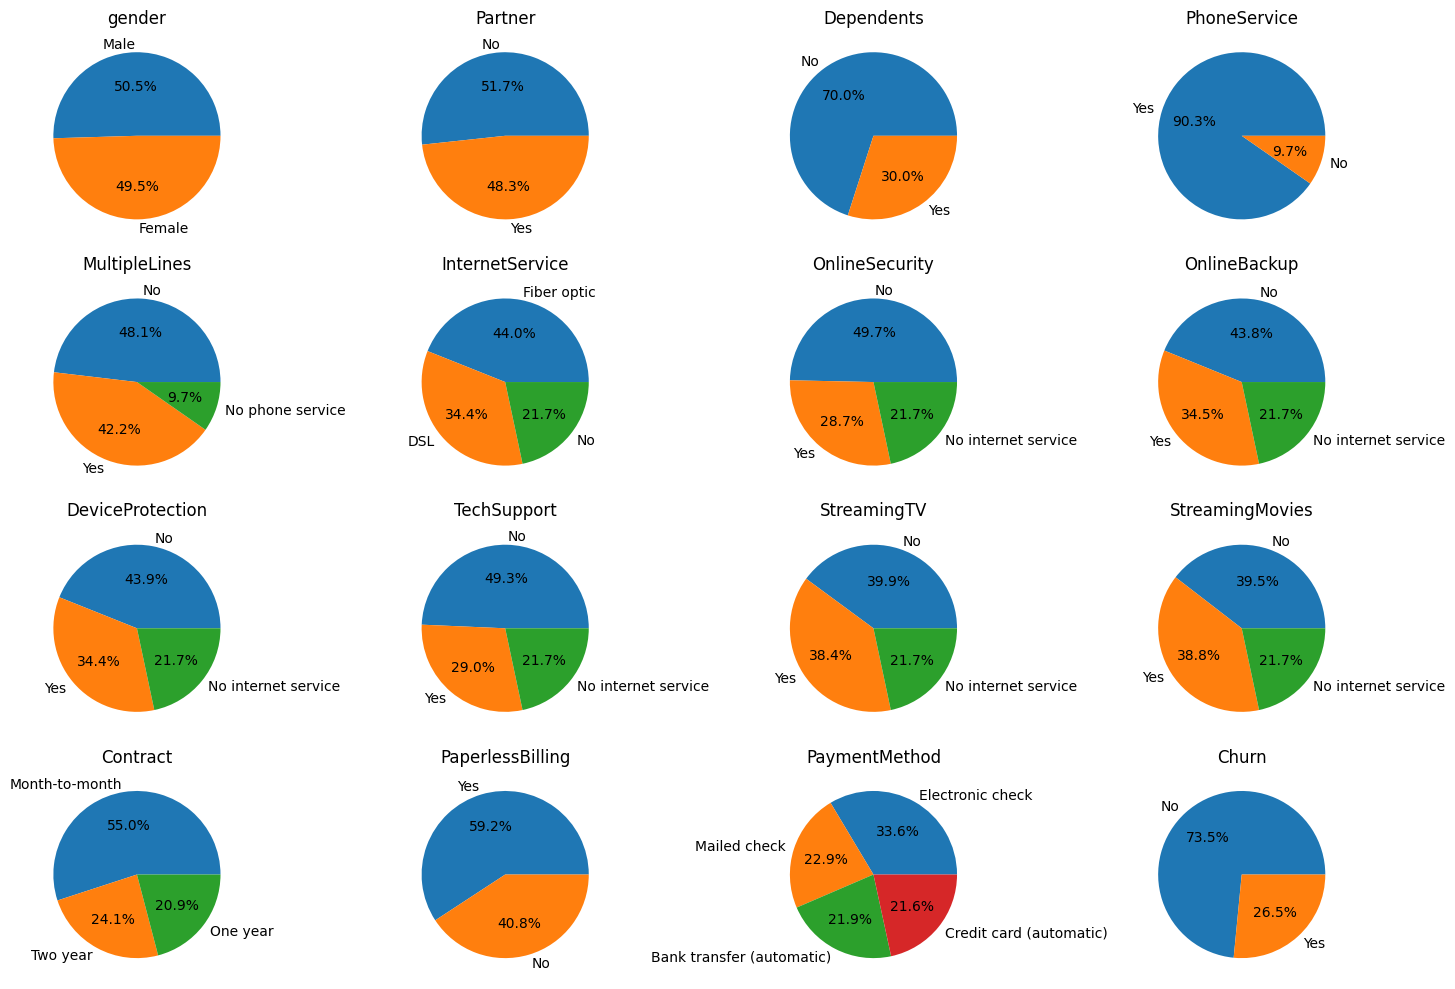

In [ ]:
def pieCharts(df):

    # Get a list of categorical columns excluding Integer values
    categorical_columns = [col for col in df.columns if col not in ['SeniorCitizen', 'tenure', 'customerID', 'MonthlyCharges', 'TotalCharges']]

    
    # Create subplots
    fig, axes = plt.subplots(4, 4, figsize=(15, 10))
    
    # Flatten the axes if there are multiple rows
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_columns):
        category_counts = df[col].value_counts()
        
        # Create a pie chart on the current subplot
        axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
        axes[i].set_title(col)
    
    # Remove any unused subplots
    for i in range(len(categorical_columns), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

pieCharts(df)


**Inference from piechats**

>

*   from the above pie chats we can clearly visvalize that Paymentmethod are form Electroic is 33% and mail is 22% and bank tranfer is 21% and credit cards 21%.

*   and chrum is 73%  NO and 26% YES

*   Contract is month to month is 55% anf two year is 24% and one year is 20%

*Like that we can inference many thing from the possible pieplots which are dislayed here*
